![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

<h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Perceptron Simple para Logistic Regression
### Se creará una neurona simple con dos pesos, un bias y la función sigmoid como función de activación.
### Se explicará *Cross Entropy* como la *Loss Function*.
### Se explicará *Gradient Descent* para reducir el error.

# Se cargan las bibliotecas necesarias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Modelo de una neurona

![perceptron](https://drive.google.com/uc?export=view&id=1Z4GnmBVNU5Sdd0DJgs0aSkaeGYyUmDYz)
### https://platzi.com/tutoriales/1157-ia-2017/2619-entrenamiento-del-perceptron/

https://drive.google.com/file/d/1Z4GnmBVNU5Sdd0DJgs0aSkaeGYyUmDYz/view?usp=share_link

# Definición de la Función de Activación

![sigmoid](https://drive.google.com/uc?export=view&id=1nh_yx9BWA2y8stOxeVjC3pmej7aDs9OM)
### https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6



In [15]:
def sigmoid(score):
  return 1/(1+np.exp(-score))

# Cross Entropy para Calcular el Error en la Clasificación
### La función de activación regresa valores entre 0 y 1 y representa la probabilidad de clasificación del dato proporcionado.
### El vector *y* es binario y, para fines de entrenamiento, el valor para cada dato es conocido.
## $ - \left ( \frac{1}{n} \right ) \sum y~ln(p) + (1-y)~ln(1-p)$

In [5]:
def calculate_error(line_parameters, points , y):
      n=points.shape[0]
      p= sigmoid(points*line_parameters)
      cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
      return cross_entropy

# Backpropagation es el mecanismo que actualiza los pesos para minimizar el error
### Se calcula Gradient Descent en cada iteración y se actualizan los pesos.
# $\triangledown E = \frac{(puntos)~(p-y)}{num\_puntos}$

![sigmoid](https://drive.google.com/uc?export=view&id=1XPZe-esbCMBbhSkILZKIfVVYc5myhws-)
### https://www.kaggle.com/getting-started/207662



In [14]:
def gradient_descent(line_parameters, points, y , lrate):
    # alpha es el learning rate
    # Se determina el número de puntos
    n=points.shape[0]
    # Se itera tantas veces como se indique (épocas)
    for i in range(2000):
        # Se determina el gradiente
        p=sigmoid(points*line_parameters)
        gradient= points.T*(p-y)*(lrate/n)
        # se actualizan los pesos y el bias
        line_parameters = line_parameters - gradient
        # Se imprime el error al final de cada iteración
        print(calculate_error(line_parameters, points, y))
    return line_parameters

# Se crean dos grupos de datos aleatorios
### Los datos en la parte superior se clasifican como cero
### Los datos en la parte inferior se clasifican como uno

In [7]:
# 200 datos a clasificar, 100 parte superior, 100 parte inferior
n_pts=100
# semilla para el generador de aleatorios
np.random.seed(0)
# factor de uno a multiplicar con el bias de la neurona (x1*w1 + x2*w2 + bias*1)
bias= np.ones(n_pts)
# se crean los datos
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
# se organizan de manera vertical
all_points=np.vstack((top_region, bottom_region))
all_points.shape

(200, 3)

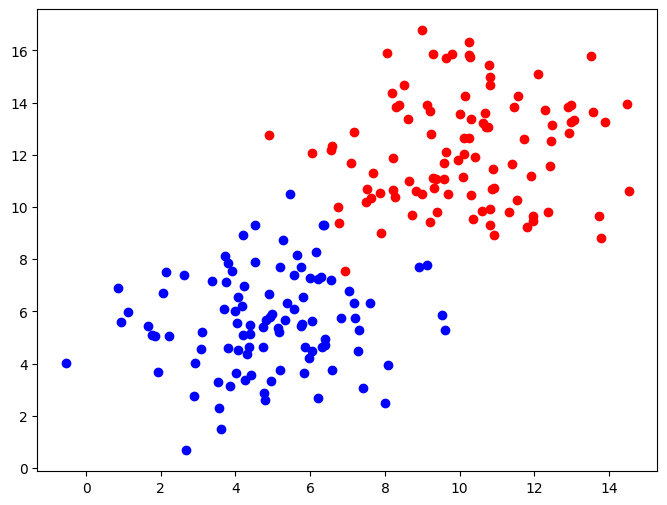

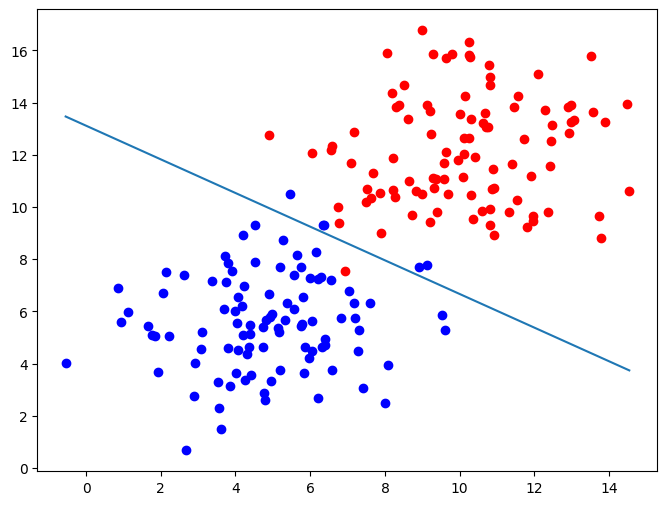

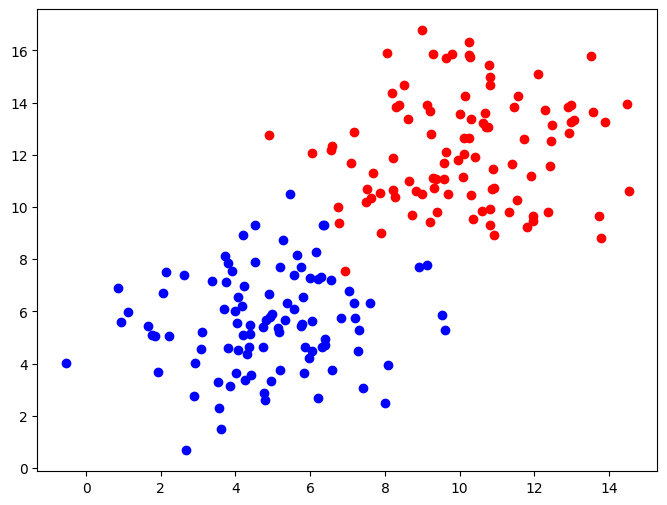

In [ ]:
 # se grafican los datos a clasificar
fig, ax= plt.subplots(figsize=(8,6))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
plt.show()

# Se crean las etiquetas del conjunto de datos

In [9]:
# los de la parte superior, en rojo, se etiquetan como 0
# los de la parte inferior, en azul, se etiquetan como 1
# se reordenan las etiquetas de manera vertical 
y=np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
y.shape

(200, 1)

# Se dan valores iniciales a los parámetros de la neurona

In [10]:
w1=0 #pESO 1
w2=0 # pESO 2
b=0 #Sesgo
line_parameters = np.matrix([w1,w2,b]).T
line_parameters.shape

(3, 1)

# Se procede al entrenamiento de la neurona
### Con learning rate de 0.06
### El número de iteraciones o épocas se da en la misma función

In [11]:
line_parameters = gradient_descent(line_parameters, all_points, y , 0.06)
print(line_parameters)
print(line_parameters.shape)

[[0.70217988]]
[[0.65793319]]
[[0.66053464]]
[[0.64635232]]
[[0.6471553]]
[[0.63883102]]
[[0.6387613]]
[[0.63297426]]
[[0.632404]]
[[0.62800492]]
[[0.62712321]]
[[0.62358427]]
[[0.62250097]]
[[0.61953818]]
[[0.61832296]]
[[0.61576673]]
[[0.6144664]]
[[0.61220769]]
[[0.6108549]]
[[0.60881964]]
[[0.60743761]]
[[0.60557341]]
[[0.60417872]]
[[0.60244733]]
[[0.60105173]]
[[0.5994246]]
[[0.59803619]]
[[0.59649166]]
[[0.59511578]]
[[0.59363719]]
[[0.5922771]]
[[0.59085157]]
[[0.58950899]]
[[0.58812649]]
[[0.58680201]]
[[0.58545473]]
[[0.58414817]]
[[0.58283002]]
[[0.58154072]]
[[0.58024696]]
[[0.57897398]]
[[0.57770092]]
[[0.57644321]]
[[0.57518799]]
[[0.57394449]]
[[0.5727049]]
[[0.57147462]]
[[0.57024898]]
[[0.56903104]]
[[0.56781804]]
[[0.56661167]]
[[0.56541033]]
[[0.5642149]]
[[0.56302446]]
[[0.56183945]]
[[0.56065933]]
[[0.55948432]]
[[0.55831409]]
[[0.55714873]]
[[0.55598806]]
[[0.55483209]]
[[0.55368071]]
[[0.55253392]]
[[0.55139163]]
[[0.55025382]]
[[0.54912045]]
[[0.54799149]]
[[0.5

# Se muestran los resultados

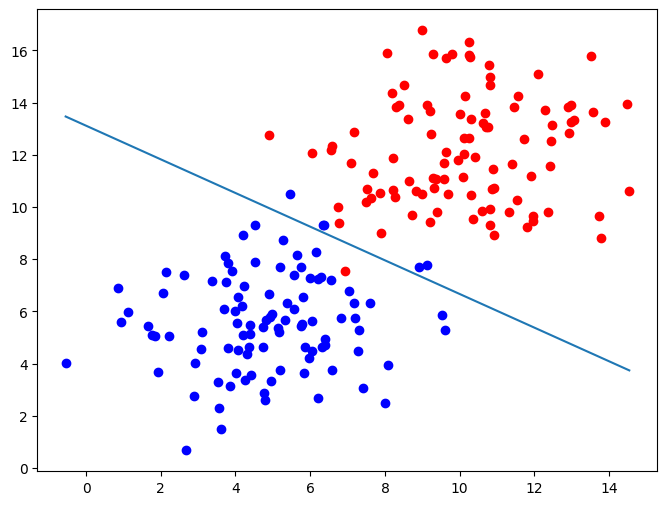

In [17]:
# se vuelven a graficar los datos
fig, ax= plt.subplots(figsize=(8,6))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
all_points=np.vstack((top_region, bottom_region))
# se extraen los pesos y el bias después del entrenamiento
w1=line_parameters.item(0)
w2=line_parameters.item(1)
b=line_parameters.item(2)
# se calcula la línea de clasificación y se grafica
x1=np.array([all_points[:,0].min(), all_points[:,0].max()])
# x1*w1 + x2*w2 + b = 0
x2= -b/w2 + (x1*(-w1/w2))
plt.plot(x1,x2)
plt.show()

# Gracias por la atención